## Import and Download


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys 
import pandas as pd
import numpy as np

In [ ]:
sys.path.insert(1, '/content/drive/MyDrive/tabular_project')
!unzip '/content/drive/MyDrive/tabular_project/house-prices.zip' -d '/content/house-prices'

Archive:  /content/drive/MyDrive/tabular_project/house-prices.zip
replace /content/house-prices/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/house-prices/data_description.txt  
  inflating: /content/house-prices/sample_submission.csv  
  inflating: /content/house-prices/test.csv  
  inflating: /content/house-prices/train.csv  


In [ ]:
train=pd.read_csv('/content/house-prices/train.csv', index_col=False)
test=pd.read_csv('/content/house-prices/test.csv', index_col=False)

## Helper Functions

In [ ]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
import math
def createDic(list_str):
  dic = {}
  counter = 0
  for i in list_str:
    # print(type(i))
    if isinstance(i, (float)) and math.isnan(i):
      # print("nan")
      dic[i] = np.NaN
    else:
      dic[i] = counter
      counter+=1
  return dic

## Analyzing and PreProcessing

Here where are changing some nan value that actually have a meaning to be nan.
NA entries in the column Alley actually mean "No alley access" 
<br>
NA entries in the column BsmtQual actually mean "no basement" 
<br>
And so on.

In [ ]:
train['Alley'] = train['Alley'].replace(np.NaN, "No alley access")
# test['Alley'] = test['Alley'].replace(np.NaN, "No alley access")
train['BsmtQual'] = train['BsmtQual'].replace(np.NaN, "No basement")
# test['BsmtQual'] = test['BsmtQual'].replace(np.NaN, "No basement")

train['BsmtCond'] = train['BsmtCond'].replace(np.NaN, "No basement")
# test['BsmtCond'] = test['BsmtCond'].replace(np.NaN, "No basement")

train['BsmtExposure'] = train['BsmtExposure'].replace(np.NaN, "No basement")
# test['BsmtExposure'] = test['BsmtExposure'].replace(np.NaN, "No basement")
train['BsmtFinType1'] = train['BsmtFinType1'].replace(np.NaN, "No basement")
# test['BsmtFinType1'] = test['BsmtFinType1'].replace(np.NaN, "No basement")
train['BsmtFinType2'] = train['BsmtFinType2'].replace(np.NaN, "No basement")
# test['BsmtFinType2'] = test['BsmtFinType2'].replace(np.NaN, "No basement")

train['FireplaceQu'] = train['FireplaceQu'].replace(np.NaN, "No fireplace")
# test['FireplaceQu'] = test['FireplaceQu'].replace(np.NaN, "No fireplace")

train['GarageType'] = train['GarageType'].replace(np.NaN, "No garage")
# test['GarageType'] = test['GarageType'].replace(np.NaN, "No garage")

train['GarageFinish'] = train['GarageFinish'].replace(np.NaN, "No garage")
# test['GarageFinish'] = test['GarageFinish'].replace(np.NaN, "No garage")
train['GarageQual'] = train['GarageQual'].replace(np.NaN, "No garage")
# test['GarageQual'] = test['GarageQual'].replace(np.NaN, "No garage")
train['GarageCond'] = train['GarageCond'].replace(np.NaN, "No garage")
# test['GarageCond'] = test['GarageCond'].replace(np.NaN, "No garage")

train['PoolQC'] = train['PoolQC'].replace(np.NaN, "No pool")
# test['PoolQC'] = test['PoolQC'].replace(np.NaN,"No pool")
train['Fence'] = train['Fence'].replace(np.NaN,"No fence")
# test['Fence'] = test['Fence'].replace(np.NaN, "No fence")
train['MiscFeature'] = train['MiscFeature'].replace(np.NaN, "None")
# test['MiscFeature'] = test['MiscFeature'].replace(np.NaN, "None")


In [ ]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
train["PoolArea"].head(200)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


0        0
1        0
2        0
3        0
4        0
      ... 
195      0
196      0
197    512
198      0
199      0
Name: PoolArea, Length: 200, dtype: int64

In [ ]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrType,8,0.5
MasVnrArea,8,0.5
Electrical,1,0.1


In [ ]:
missing_values_table(train)


Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrType,8,0.5
MasVnrArea,8,0.5
Electrical,1,0.1


# Treat Missings Values

## Deleting Rows / Listwise Deletion

Delete all row with missing values

In [ ]:
train_delete_row = train.copy()
numeric_features = train_delete_row.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_delete_row[i].unique())
  # print(dic)
  # print(train_delete_row[i].unique())
  train_delete_row[i] = train_delete_row[i].map(dic)
  # print(train_delete_row[i])
missing_values_table(train_delete_row)
train_delete_row.dropna(inplace=True)
train_delete_row.isnull().sum()


Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:

train_delete_row.to_csv('house-prices/deletedRows.csv', index=False)
train_delete_row

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


## Replacing With Mean

In [ ]:
def filter1(dataset):
    for col in dataset.columns:
        #print(dataset[col].dtypes)
        if dataset[col].dtypes=='object':
            dataset[col].fillna(dataset[col].mode()[0],inplace=True)
        elif dataset[col].dtypes=='int64' or dataset[col].dtypes=='float64':
            dataset[col].fillna(dataset[col].mean(),inplace=True)            

    return dataset

In [ ]:
train_mean = train.copy()

train_mean = filter1(train_mean)
# train_mean


In [ ]:
missing_values_table(train_mean)

Your selected dataframe has 81 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
numeric_features = train_mean.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_mean[i].unique())
  # print(dic)
  # print(train_mean[i].unique())
  train_mean[i] = train_mean[i].map(dic)
  # print(train_mean[i])


In [ ]:
train_mean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


In [ ]:
train_mean.to_csv('house-prices/mean.csv', index=False)
train_mean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


## Assigning An Unique Category

In [ ]:
train_unique_categ = train.copy()
missing_values_table(train_unique_categ)


Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrType,8,0.5
MasVnrArea,8,0.5
Electrical,1,0.1


In [ ]:
train_unique_categ.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

Some of the missing values cannot be reasonably estimated (e.g. the year in which the garage of a house was built). Such missing values are replaced by a numeric but non-sensical value such as -9999

In [ ]:

train_unique_categ['GarageYrBlt'] = train_unique_categ['GarageYrBlt'].fillna(-9999)
train_unique_categ['MasVnrArea'] = train_unique_categ['MasVnrArea'].fillna(-9999)
train_unique_categ['LotFrontage'] = train_unique_categ['LotFrontage'].fillna(-9999)


In [ ]:
train_unique_categ['MasVnrType'] = train_unique_categ['MasVnrType'].fillna("U")
train_unique_categ['MasVnrType'] = train_unique_categ['MasVnrType'].map({"BrkFace": 1, "Stone": 2, "BrkCmn": 3, "None": 0,  "U": 4})
train_unique_categ['Electrical'] = train_unique_categ['Electrical'].fillna("U")
train_unique_categ['Electrical'] = train_unique_categ['Electrical'].map({"SBrkr": 1, "FuseF": 2, "FuseA": 3, "None": 0,"FuseP":4,  "Mix": 5,  "U": 6})
missing_values_table(train_unique_categ)

Your selected dataframe has 81 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
numeric_features = train_unique_categ.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_unique_categ[i].unique())
  # print(dic)
  # print(train_unique_categ[i].unique())
  train_unique_categ[i] = train_unique_categ[i].map(dic)
  # print(train_unique_categ[i])

In [ ]:
train_unique_categ

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


## Using Algorithms Which Support Missing Values | KNN Imputer 5 nearest neighbours

In [ ]:
train_knn = train.copy()


In [ ]:
train_knn['MasVnrType'] = train_knn['MasVnrType'].map({"BrkFace": 1, "Stone": 2, "BrkCmn": 3, "None": 0})
train_knn['Electrical'] = train_knn['Electrical'].map({"SBrkr": 1, "FuseF": 2, "FuseA": 3, "None": 0,"FuseP":4,  "Mix": 5,  "U": 6})


In [ ]:
missing_values_table(train_knn)

Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrType,8,0.5
MasVnrArea,8,0.5
Electrical,1,0.1


In [ ]:
train_knn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,4,2010,WD,Normal,142125


In [ ]:
numeric_features = train_knn.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_knn[i].unique())
  # print(dic)
  # print(train_knn[i].unique())
  train_knn[i] = train_knn[i].map(dic)
  # print(train_knn[i])

In [ ]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_knn = pd.DataFrame(scaler.fit_transform(train_knn), columns = train_knn.columns)
train_knn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,0.0,0.150685,0.033420,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.090909,0.50,0.0,0.0,0.241078
1,0.000685,0.000000,0.0,0.202055,0.038795,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.363636,0.25,0.0,0.0,0.203583
2,0.001371,0.235294,0.0,0.160959,0.046507,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.727273,0.50,0.0,0.0,0.261908
3,0.002056,0.294118,0.0,0.133562,0.038561,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.090909,0.00,0.0,0.2,0.145952
4,0.002742,0.235294,0.0,0.215753,0.060576,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,1.000000,0.50,0.0,0.0,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.0,0.140411,0.030929,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.636364,0.25,0.0,0.0,0.194556
1456,0.997944,0.000000,0.0,0.219178,0.055505,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,0.00,0.00000,0.090909,1.00,0.0,0.0,0.243161
1457,0.998629,0.294118,0.0,0.154110,0.036187,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.75,0.25,0.16129,0.363636,1.00,0.0,0.0,0.321622
1458,0.999315,0.000000,0.0,0.160959,0.039342,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.272727,1.00,0.0,0.0,0.148903


In [ ]:

imputer = KNNImputer(n_neighbors=5)
train_knn5 = pd.DataFrame(imputer.fit_transform(train_knn),columns = train_knn.columns)


In [ ]:
train_knn5.isna().any()
train_knn5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,0.0,0.150685,0.033420,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.090909,0.50,0.0,0.0,0.241078
1,0.000685,0.000000,0.0,0.202055,0.038795,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.363636,0.25,0.0,0.0,0.203583
2,0.001371,0.235294,0.0,0.160959,0.046507,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.727273,0.50,0.0,0.0,0.261908
3,0.002056,0.294118,0.0,0.133562,0.038561,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.090909,0.00,0.0,0.2,0.145952
4,0.002742,0.235294,0.0,0.215753,0.060576,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,1.000000,0.50,0.0,0.0,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.0,0.140411,0.030929,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.636364,0.25,0.0,0.0,0.194556
1456,0.997944,0.000000,0.0,0.219178,0.055505,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,0.00,0.00000,0.090909,1.00,0.0,0.0,0.243161
1457,0.998629,0.294118,0.0,0.154110,0.036187,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.75,0.25,0.16129,0.363636,1.00,0.0,0.0,0.321622
1458,0.999315,0.000000,0.0,0.160959,0.039342,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.272727,1.00,0.0,0.0,0.148903


In [ ]:
train_knn5.to_csv('house-prices/knn.csv', index=False)
train_knn5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,0.0,0.150685,0.033420,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.090909,0.50,0.0,0.0,0.241078
1,0.000685,0.000000,0.0,0.202055,0.038795,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.363636,0.25,0.0,0.0,0.203583
2,0.001371,0.235294,0.0,0.160959,0.046507,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.727273,0.50,0.0,0.0,0.261908
3,0.002056,0.294118,0.0,0.133562,0.038561,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.090909,0.00,0.0,0.2,0.145952
4,0.002742,0.235294,0.0,0.215753,0.060576,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,1.000000,0.50,0.0,0.0,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.0,0.140411,0.030929,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.636364,0.25,0.0,0.0,0.194556
1456,0.997944,0.000000,0.0,0.219178,0.055505,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,0.00,0.00000,0.090909,1.00,0.0,0.0,0.243161
1457,0.998629,0.294118,0.0,0.154110,0.036187,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.75,0.25,0.16129,0.363636,1.00,0.0,0.0,0.321622
1458,0.999315,0.000000,0.0,0.160959,0.039342,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00000,0.272727,1.00,0.0,0.0,0.148903


# Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def model(train_f):
  plt.style.use(style='ggplot')
  plt.rcParams['figure.figsize'] = (10, 6)
  y = np.log(train_f.SalePrice)
  X = train_f.drop(['SalePrice', 'Id'], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(
                            X, y, random_state=42, test_size=.33)
  lr = linear_model.LinearRegression()
  X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  model = lr.fit(X_train, y_train)
  print ("R^2 is: \n", model.score(X_test, y_test))
  predictions = model.predict(X_test)
  print ('RMSE is: \n', mean_squared_error(y_test, predictions))
  actual_values = y_test
  plt.scatter(predictions, actual_values, alpha=.7,
              color='b') #alpha helps to show overlapping data
  plt.xlabel('Predicted Price')
  plt.ylabel('Actual Price')
  plt.title('Linear Regression Model')
  plt.show()


R^2 is: 
 0.8555125079593011
RMSE is: 
 0.02462520314019254


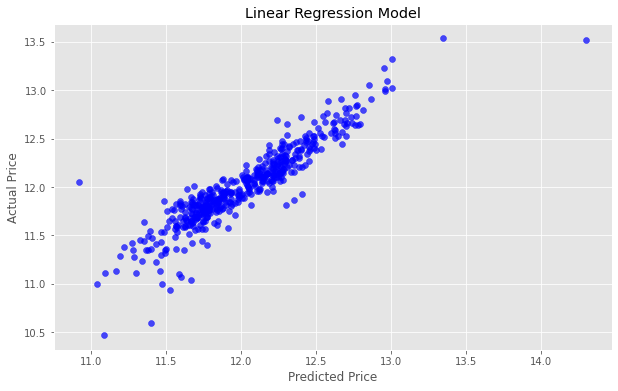

R^2 is: 
 0.7349527696094611
RMSE is: 
 0.04269961875815863


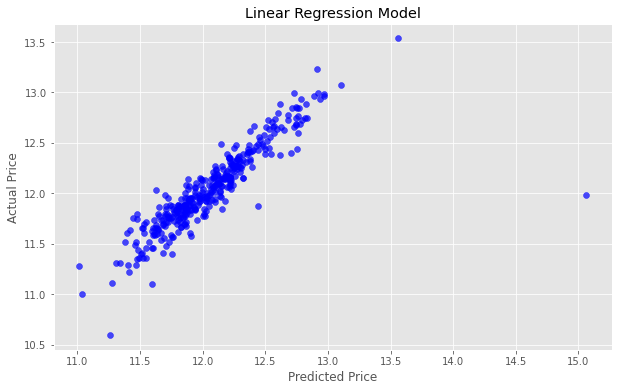

R^2 is: 
 0.8545977403553456
RMSE is: 
 0.024781108248346288


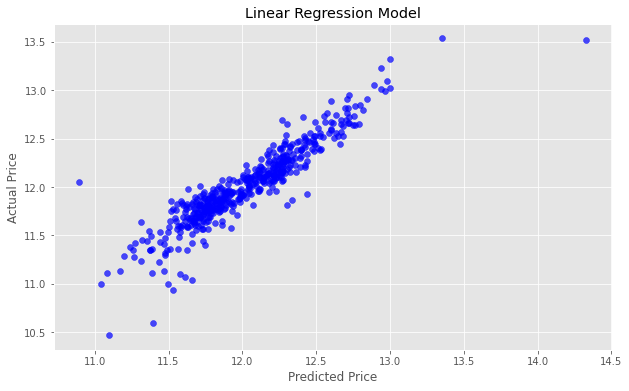

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R^2 is: 
 0.7272740773698536
RMSE is: 
 0.09846197256503761


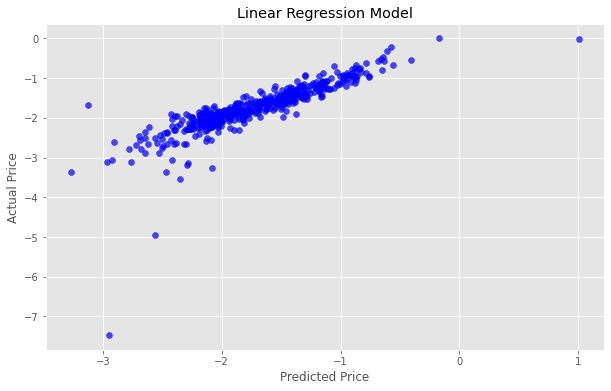

In [ ]:
model(train_mean) # Highest score biggest R squared lowest rmse
model(train_delete_row) 
model(train_unique_categ) 
model(train_knn5) # poorest score lowest r squared and biggest rmse

# # Logistic Regression :
# print("logistic Regression: Replacing With Mean")
# logisticRegression(train_mean)
# print("logistic Regression: Deleting Rows")
# logisticRegression(train_delete_row)
# print("logistic Regression: Unique Category")
# logisticRegression(train_unique_categ)
# print("logistic Regression: KNN")
# logisticRegression(train_knn)